## Seaborn 101 (a crash course for students)

Just something quick and simple on ***Seaborn***. This is another key Python library used a lot in Data Science you need to know something about.

*DISCLAIMER: This material has to be intended as a pragmatic shortcut to move on, and should NOT stop you from attending a complete Matplotlib course/tutorial*

## Before starting.. why Seaborn?

Well, it is a choice. Plenty of similar product do exist. BUT: there are reasons for using Matplotlib, and reasons for not using it in many cases. A rough summary (intended to be neither exhaustive nor detailed) is below.

Matplotlib is a useful tool, but it leaves a lot to be desired, in so many cases. E.g.

   * Matplotlib’s defaults are sometimes not the best choices. It was based off of MatLab circa 1999, and this shows.
   * Matplotlib is relatively low-level. Doing sophisticated statistical visualization is possible, but often requires a lot of additional heavy code
   * Matplotlib is not designed for use with Pandas dataframes. In order to visualize data from a Pandas dataframe, you must extract each series and often concatenate these series’ together into the right format. Expensive.


## Introduction

The answer to these problems could be Seaborn. 

Seaborn provides an API on top of Matplotlib which uses sane plot & color defaults, uses simple functions for common statistical plot types, and which integrates with the functionality provided by Pandas dataframes.

Import the basics first.

In [1]:
# Import the necessary packages and modules
#from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Before importing seaborn, let's make a comparison.

We can set the seaborn style as the default matplotlib style by calling `sns.set()`: after doing this, even simple Matplotlib plots will look much better. Let’s look at a before and after, first of all.

BEFORE

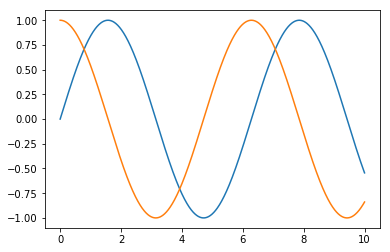

In [2]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), x, np.cos(x));

AFTER

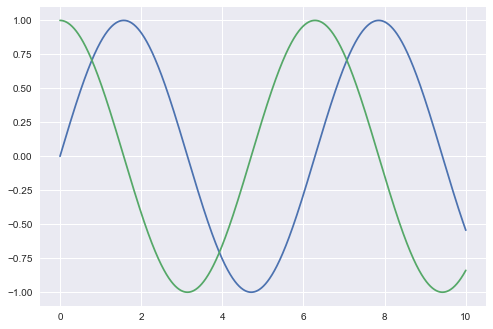

In [3]:
import seaborn as sns
sns.set()
plt.plot(x, np.sin(x), x, np.cos(x));

Yes: it looks like cosmetics (and it is better..) but there is also more (unseen so far..).

## Exploring Seaborn plotting capabilities

The main idea of Seaborn is that it can create complicated plot types from Pandas data with relatively simple commands.

Let’s take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following could be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the seaborn API is much more convenient.

### Histograms, KDE, and Densities

Often you need to visualize statistical data. And often all you need it to plot histograms and joint distributions of variables. Seaborn provides simple tools to make this happen.

In [4]:
data = np.random.multivariate_normal([0, 0], [[1, 0], [0, 10]], size=200)
#data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=200)

# The multivariate normal, multinormal or Gaussian distribution is a
# generalization of the one-dimensional normal distribution to higher dimensions.

data = pd.DataFrame(data, columns=['x', 'y'])
data

,x,y
0,-1.626703,-1.415025
1,0.207876,-0.206722
2,0.423653,-0.740488
3,-1.120838,7.207432
4,-0.251067,1.999380
5,0.937695,0.882729
6,0.868012,-4.436728
7,1.607371,-2.683696
8,-1.072334,-8.127010
9,-0.158512,-5.845814


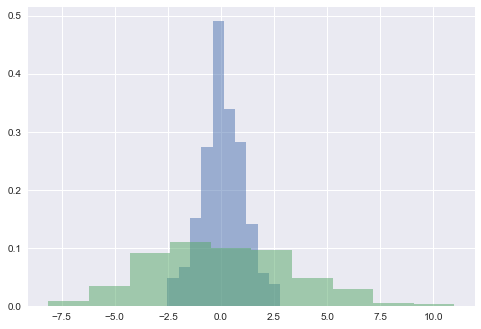

In [5]:
for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)     # you should smell the power of Pandas DataFrames here..

Very evident how quickly you got to a useful plot in data exploration...

**Exercise**: Try to change some optional parameters above and see the effect. Check the doc to learn what they do, and which other parameters ydo exist and you may play with.

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation (KDE):

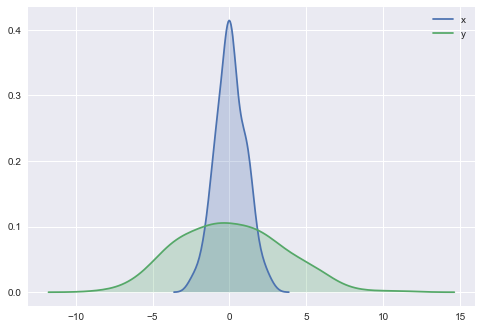

In [6]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

You can combine histograms and KDEs on a single plot using `distplot`:

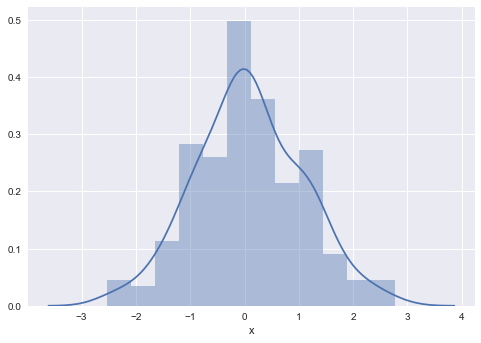

In [7]:
sns.distplot(data['x']);

If we pass the full 2D dataset to `kdeplot`, we will get a 2D visualization of the data:

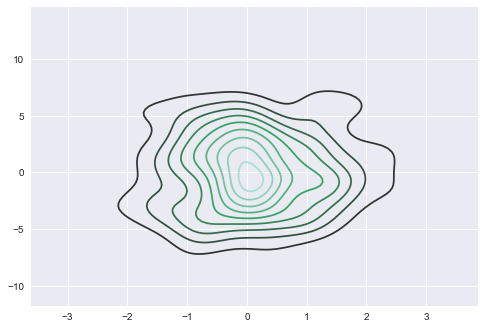

In [8]:
sns.kdeplot(data)

We can see the joint distribution and the marginal distributions together using `sns.jointplot`. For this plot, we’ll set the style to a white background:

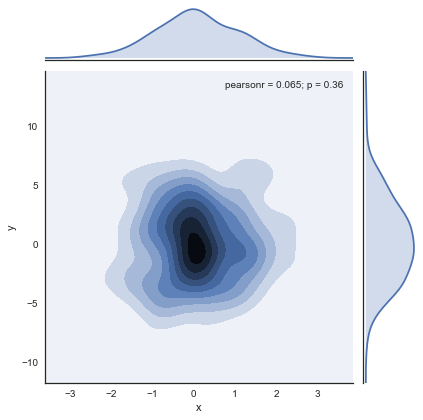

In [9]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

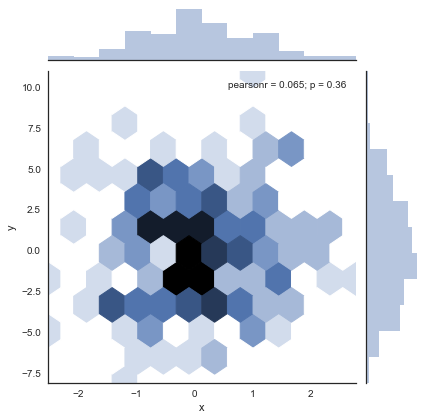

In [10]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')   # hexagonally-based histogram

## Pair plots

When you generalize joint plots to data sets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multi-dimensional data, when you’d like to plot all pairs of values against each other.

We’ll demo this with the well-known iris dataset, which lists measurements of petals and sepals of three iris species:

In [11]:
iris = sns.load_dataset("iris")
type(iris)

pandas.core.frame.DataFrame

In [12]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**QUIZ**: Oh my..! Is this magic?!? Have I understood what happened with `load_dataset`?

`load_dataset` looks for online csv files on https://github.com/mwaskom/seaborn-data and load them. `load_dataset` actually returns a pandas DataFrame object, which you can confirm with type(<the_name>). BTW, you can import yours..

    import pandas as pd
    my_dataset = pd.read_csv('my_dataset.csv')

We will use it later on..

Visualizing the multi-dimensional relationships among the samples is as easy as calling `sns.pairplot`:

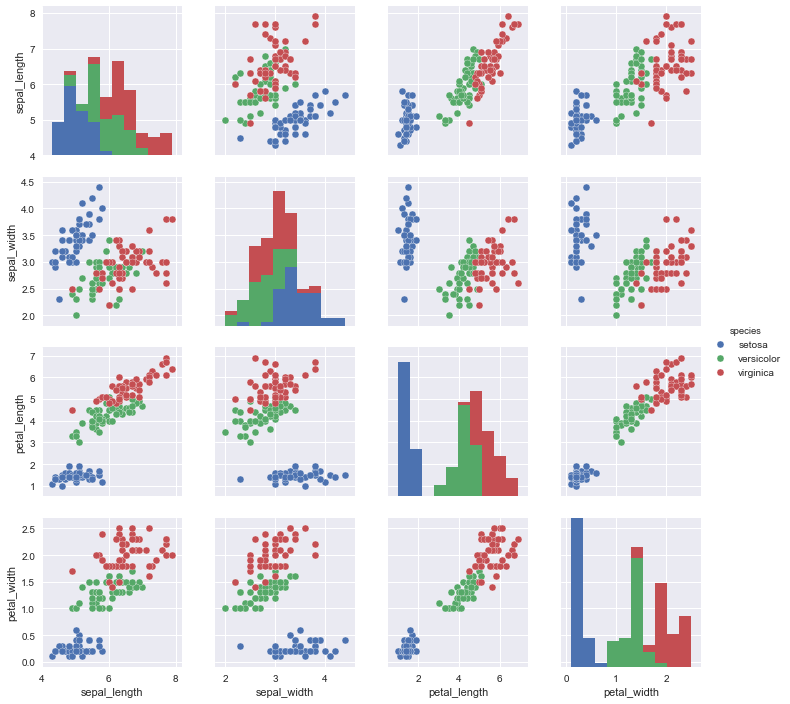

In [13]:
sns.pairplot(iris, hue='species', size=2.5);

## Faceted histos

Sometimes the best way to view data is via histograms of subsets. Seaborn’s FacetGrid makes this extremely simple. 

E.g. let's take a look at some data which shows the amount that restaurant staff receive in tips based on various indicator data:

In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


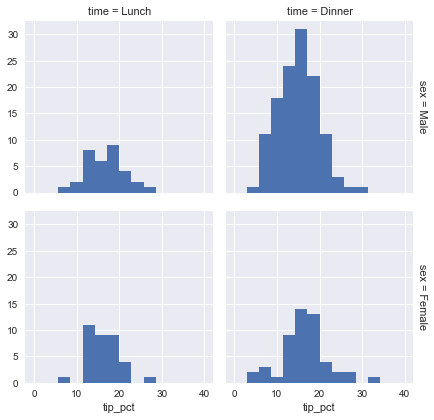

In [15]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

## Categorical scatterplots

A simple way to show the the values of some quantitative variable across the levels of a categorical variable uses `stripplot()`, which generalizes a scatterplot to the case where one of the variables is categorical:

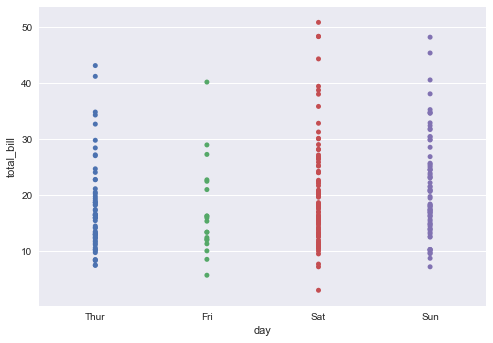

In [16]:
sns.stripplot(x="day", y="total_bill", data=tips);

In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using some random “jitter”:

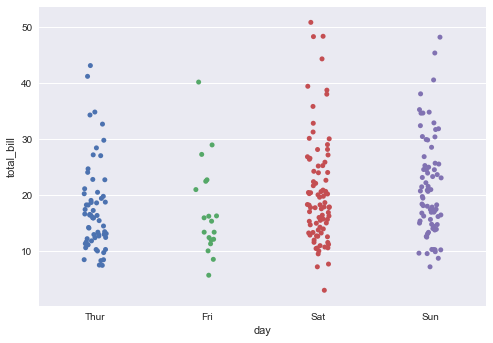

In [17]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

A different approach would be to use the function `swarmplot()`, which positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points:

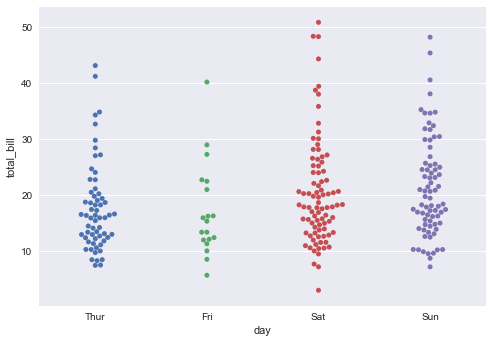

In [18]:
sns.swarmplot(x="day", y="total_bill", data=tips);

It’s also possible to add a nested categorical variable with the hue parameter. Above the color and position on the categorical axis are redundant, but now each provides information about one of the two variables:

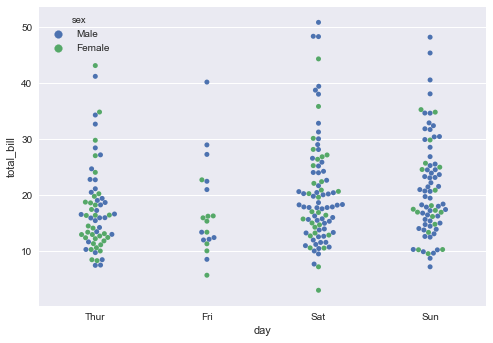

In [19]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

Another variable in the breakdown, and another oientation.

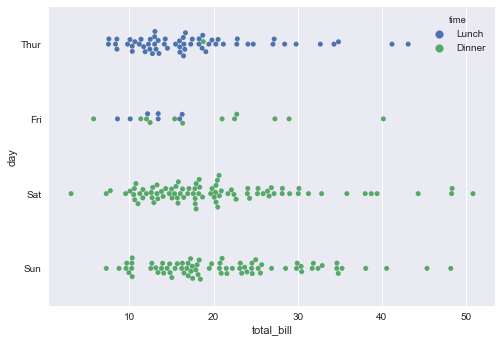

In [20]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

## Box plots

At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels. 

Box plots can be used to visualize this data well. This allows you to view the distribution of a parameter within bins defined by any other parameter.

Basically, you need to understand the plot carefully. This kind of plot shows the three quartile values of the distribution along with extreme values (from the documentation: "The “whiskers” extend to points that lie within 1.5 IQRs - inter-quartile range - of the lower and upper quartile, and then observations that fall outside this range are displayed independently"). Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

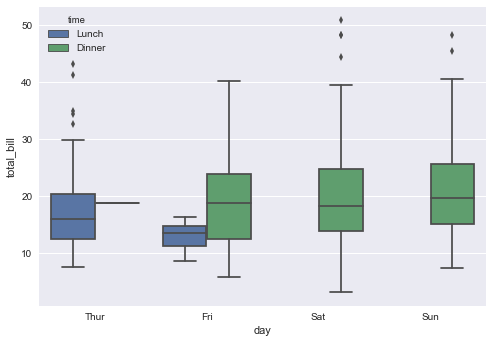

In [21]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

Another example:

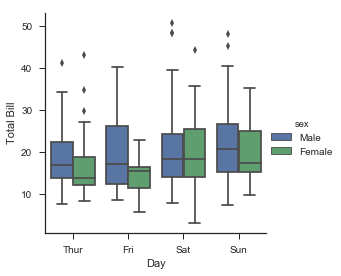

In [22]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

## Violin plots

A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure described in the distributions tutorial:

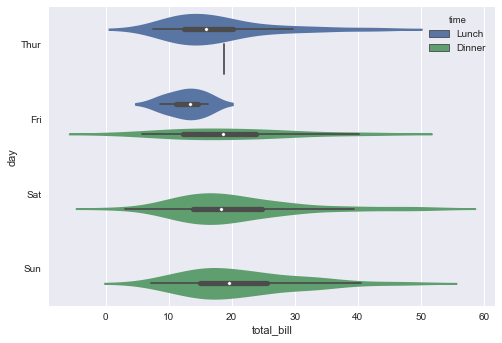

In [23]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

It can also be useful to combine `swarmplot()` with `violinplot()` (or `boxplot()`) to show each observation along with a summary of the distribution:

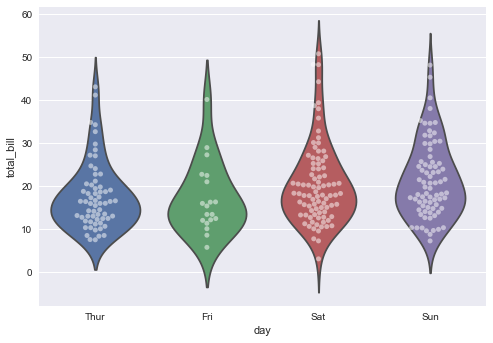

In [24]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5);

# Joint Distributions

Similar to the pairplot we saw above, we can use `sns.jointplot` to show the joint distribution between different datasets, along with the associated marginal distributions:

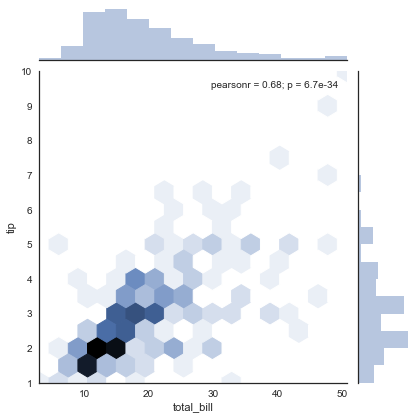

In [25]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

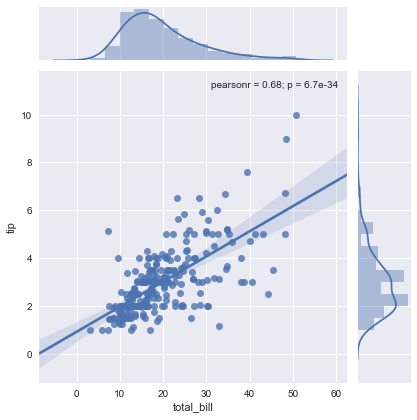

In [26]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

We could continue for ages... but you got the point. Get (plenty) more in the official Seaborn documentation.

## Done. That's all for the "Seaborn 101" crash course.

The appetizer is over. Time for you to move to the main course, i.e. a good Seaborn course and/or tutorial.

## What we have learnt

How to do some more advanced plots with Seaborn. Good, because we will benefit a lot from using DataFrames in Pandas and visualisation in Seaborn..

## Reading material

* Documentation: https://seaborn.pydata.org/tutorial/categorical.html and related pages.
